# Table of Contents

- Problem Statement
- Data Dictionary
- Imports and Data Cleaning
- Exploratory Data Analysis and Data Vis

# Problem Statement

Analyzing data from car crashes in Chicago in 2019 to determine what are the highest contributing factors to a severe injury in result of a car crash. Using these contributing factors to make recommendations for local drivers and local government to make the roads safer, as well as to make recommendations for self-driving car companies.

# Data Dictionary

# Imports and Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score  #For finding best K= score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from math import sqrt

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_roc_curve, r2_score, mean_squared_error 
pd.set_option('display.max_columns', None) # Displays all columns

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import LinearSVC, SVC


In [2]:
pwd!

'/Users/ch/Desktop/GA/Projects/Project5/Cooper'

In [3]:
crashes2019 = pd.read_csv('./Data/Traffic_Crashes__Crashes_2019.csv')

In [4]:
crashes2019.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,cb2b9a910babe20dfad7fc27c04c29e7b199fa94dc57bf...,JC111663,NaN,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/10/2019 02:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,235,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093)
1,efa10cf15e9c7c9df8a9e946a85eda9836f66af895c982...,JC100635,Y,01/01/2019 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:10:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3332,W,MAYPOLE AVE,1123,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.883685,-87.710043,POINT (-87.710042988194 41.883684713555)
2,0777b210b7a60ac1338d90e20520d421c3241971049303...,JC100780,NaN,01/01/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",01/01/2019 02:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1649,W,ADDISON ST,1922,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.946856,-87.670809,POINT (-87.67080913181 41.946856430289)
3,caa1629056b16f2e6ec6797d6252d6da8ec1142c0ee982...,JC100033,NaN,01/01/2019 12:04:00 AM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,2.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",01/01/2019 12:14:00 AM,IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,188,W,MADISON ST,122,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,3,1,41.882058,-87.633478,POINT (-87.633478360366 41.882058104945)
4,cb22668bf69d9c99e50c615a9ff996328190859a0e8351...,JC100171,NaN,01/01/2019 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:07:00 AM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",FAILING TO REDUCE SPEED TO AVOID CRASH,4054,N,MOBILE AVE,1624,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0,3,1,41.954529,-87.784311,POINT (-87.784311465374 41.9545292855)


In [5]:
crashes2019['CRASH_DATE_EST_I'].value_counts()

Y    7346
N    1294
Name: CRASH_DATE_EST_I, dtype: int64

In [6]:
crashes2019['CRASH_DATE_EST_I'].fillna('N',inplace=True)

In [7]:
crashes2019.shape

(117427, 49)

In [8]:
crashes2019.isnull().sum()

CRASH_RECORD_ID                       0
RD_NO                                 0
CRASH_DATE_EST_I                      0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                          98175
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                        3609
CRASH_TYPE                            0
INTERSECTION_RELATED_I            89521
NOT_RIGHT_OF_WAY_I               111617
HIT_AND_RUN_I                     84161
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [9]:
crashes2019['REPORT_TYPE'].value_counts()

NOT ON SCENE (DESK REPORT)    60376
ON SCENE                      53442
Name: REPORT_TYPE, dtype: int64

In [10]:
crashes2019.drop(columns=['CRASH_RECORD_ID',
                          'REPORT_TYPE',
                          'CRASH_DATE_EST_I','LANE_CNT',
                          'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I',
                          'HIT_AND_RUN_I','PHOTOS_TAKEN_I',
                          'STATEMENTS_TAKEN_I','DOORING_I',
                          'WORK_ZONE_I','WORK_ZONE_TYPE',
                          'WORKERS_PRESENT_I',
                          'INJURIES_UNKNOWN'], inplace=True)

In [11]:
crashes2019.shape

(117427, 35)

In [12]:
crashes2019.isnull().sum()

RD_NO                              0
CRASH_DATE                         0
POSTED_SPEED_LIMIT                 0
TRAFFIC_CONTROL_DEVICE             0
DEVICE_CONDITION                   0
WEATHER_CONDITION                  0
LIGHTING_CONDITION                 0
FIRST_CRASH_TYPE                   0
TRAFFICWAY_TYPE                    0
ALIGNMENT                          0
ROADWAY_SURFACE_COND               0
ROAD_DEFECT                        0
CRASH_TYPE                         0
DAMAGE                             0
DATE_POLICE_NOTIFIED               0
PRIM_CONTRIBUTORY_CAUSE            0
SEC_CONTRIBUTORY_CAUSE             0
STREET_NO                          0
STREET_DIRECTION                   0
STREET_NAME                        0
BEAT_OF_OCCURRENCE                 0
NUM_UNITS                          0
MOST_SEVERE_INJURY               263
INJURIES_TOTAL                   263
INJURIES_FATAL                   263
INJURIES_INCAPACITATING          263
INJURIES_NON_INCAPACITATING      263
I

In [13]:
crashes2019.loc[crashes2019['LATITUDE'].isna(),['LONGITUDE','LOCATION']]

,LONGITUDE,LOCATION
122,NaN,NaN
298,NaN,NaN
688,NaN,NaN
1007,NaN,NaN
1281,NaN,NaN
...,...,...
116586,NaN,NaN
116956,NaN,NaN
117160,NaN,NaN
117181,NaN,NaN


In [14]:
crashes2019.dropna(axis=0,subset=['LATITUDE','LONGITUDE','LOCATION'],inplace=True)

In [15]:
crashes2019.set_index(['RD_NO'], inplace = True)

In [16]:
crashes2019.isnull().sum()

CRASH_DATE                         0
POSTED_SPEED_LIMIT                 0
TRAFFIC_CONTROL_DEVICE             0
DEVICE_CONDITION                   0
WEATHER_CONDITION                  0
LIGHTING_CONDITION                 0
FIRST_CRASH_TYPE                   0
TRAFFICWAY_TYPE                    0
ALIGNMENT                          0
ROADWAY_SURFACE_COND               0
ROAD_DEFECT                        0
CRASH_TYPE                         0
DAMAGE                             0
DATE_POLICE_NOTIFIED               0
PRIM_CONTRIBUTORY_CAUSE            0
SEC_CONTRIBUTORY_CAUSE             0
STREET_NO                          0
STREET_DIRECTION                   0
STREET_NAME                        0
BEAT_OF_OCCURRENCE                 0
NUM_UNITS                          0
MOST_SEVERE_INJURY               259
INJURIES_TOTAL                   259
INJURIES_FATAL                   259
INJURIES_INCAPACITATING          259
INJURIES_NON_INCAPACITATING      259
INJURIES_REPORTED_NOT_EVIDENT    259
I

In [17]:
crashes2019na = crashes2019[crashes2019.isna().any(axis=1)]

In [18]:
crashes2019na

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
RD_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JC100375,01/01/2019 06:13:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DUSK,FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",01/01/2019 06:13:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,2601,E,93RD ST,423,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3,1,41.726192,-87.560748,POINT (-87.560748422829 41.726191675334)
JC105947,01/04/2019 03:00:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,OTHER OBJECT,OTHER,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",01/05/2019 04:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,10600,S,HALSTED ST,2233,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,6,1,41.701365,-87.642808,POINT (-87.642807537152 41.701364724583)
JC105191,01/05/2019 12:06:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",01/05/2019 12:36:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,310,S,CAMPBELL AVE,1125,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7,1,41.877172,-87.688903,POINT (-87.68890307481 41.877172158451)
JC109326,01/08/2019 02:00:00 PM,0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",01/08/2019 02:05:00 PM,NOT APPLICABLE,NOT APPLICABLE,1401,W,DIVISION ST,1213,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,3,1,41.903298,-87.662685,POINT (-87.662684611762 41.903297960345)
JC111236,01/10/2019 02:52:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",01/10/2019 02:52:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,523,W,76TH ST,621,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,1,41.756075,-87.637819,POINT (-87.637818994636 41.756074553457)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JC554796,12/21/2019 03:32:00 AM,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",12/21/2019 03:49:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,4821,W,DIVISION ST,1531,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,7,12,41.902233,-87.746856,POINT (-87.746856165598 41.902232814035)
JC562421,12/27/2019 09:09:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",12/27/2019 09:17:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,1343,S,KOLIN AVE,1011,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,6,12,41.862946,-87.733495,POINT (-87.733494649444 41.862945952252)
JC564133,12/29/2019 12:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",12/29/2019 12:55:00 PM,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,5424,N,WINTHROP AVE,2023,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,1,12,41.980774,-87.658083,POINT (-87.658082767361 41.980774178695)


In [19]:
crashes2019['CRASH_DAY_OF_WEEK'].value_counts().sort_values()

1    14094
2    16299
4    16461
5    16883
3    16918
7    17287
6    18568
Name: CRASH_DAY_OF_WEEK, dtype: int64

In [20]:
def get_value_counts(dataset,columns):
    for column in columns:
        print(dataset[column].value_counts().sort_values(ascending=False))

In [21]:
listofcolumns=['MOST_SEVERE_INJURY','INJURIES_FATAL','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION']
data=crashes2019

get_value_counts(data,listofcolumns)

NO INDICATION OF INJURY     100066
NONINCAPACITATING INJURY      9141
REPORTED, NOT EVIDENT         4943
INCAPACITATING INJURY         2001
FATAL                          100
Name: MOST_SEVERE_INJURY, dtype: int64
0.0    116151
1.0        95
2.0         4
3.0         1
Name: INJURIES_FATAL, dtype: int64
0.0    114237
1.0      1757
2.0       191
3.0        44
4.0        16
5.0         6
Name: INJURIES_INCAPACITATING, dtype: int64
0.0     106750
1.0       7537
2.0       1322
3.0        396
4.0        164
5.0         43
6.0         24
7.0          6
10.0         3
11.0         2
8.0          1
21.0         1
16.0         1
9.0          1
Name: INJURIES_NON_INCAPACITATING, dtype: int64
0.0     110725
1.0       4315
2.0        882
3.0        225
4.0         64
5.0         30
6.0          5
7.0          2
8.0          1
9.0          1
15.0         1
Name: INJURIES_REPORTED_NOT_EVIDENT, dtype: int64
2.0     53243
1.0     35078
3.0     15329
4.0      5949
5.0      2606
0.0      2161
6.0      1

In [22]:
crashes2019.isnull().sum()

CRASH_DATE                         0
POSTED_SPEED_LIMIT                 0
TRAFFIC_CONTROL_DEVICE             0
DEVICE_CONDITION                   0
WEATHER_CONDITION                  0
LIGHTING_CONDITION                 0
FIRST_CRASH_TYPE                   0
TRAFFICWAY_TYPE                    0
ALIGNMENT                          0
ROADWAY_SURFACE_COND               0
ROAD_DEFECT                        0
CRASH_TYPE                         0
DAMAGE                             0
DATE_POLICE_NOTIFIED               0
PRIM_CONTRIBUTORY_CAUSE            0
SEC_CONTRIBUTORY_CAUSE             0
STREET_NO                          0
STREET_DIRECTION                   0
STREET_NAME                        0
BEAT_OF_OCCURRENCE                 0
NUM_UNITS                          0
MOST_SEVERE_INJURY               259
INJURIES_TOTAL                   259
INJURIES_FATAL                   259
INJURIES_INCAPACITATING          259
INJURIES_NON_INCAPACITATING      259
INJURIES_REPORTED_NOT_EVIDENT    259
I

In [23]:
crashes2019['INJURIES_FATAL'].isnull().sum()

259

In [24]:
crashes2019['INJURIES_FATAL'].value_counts()

0.0    116151
1.0        95
2.0         4
3.0         1
Name: INJURIES_FATAL, dtype: int64

In [25]:
def impute_columns(dataset,columnslist):
    for column in columnslist:
        dataset[column] = dataset[column].map(lambda x: np.random.choice(dataset[column].dropna()) if pd.isna(x) else x)
    return dataset

crashes2019 = impute_columns(crashes2019,['MOST_SEVERE_INJURY',
                                          'INJURIES_TOTAL',
                                          'INJURIES_FATAL',
                                          'INJURIES_INCAPACITATING',
                                          'INJURIES_NON_INCAPACITATING',
                                          'INJURIES_REPORTED_NOT_EVIDENT',
                                          'INJURIES_NO_INDICATION'])

In [26]:
crashes2019['INJURIES_FATAL'].value_counts()

0.0    116410
1.0        95
2.0         4
3.0         1
Name: INJURIES_FATAL, dtype: int64

In [27]:
crashes2019.head(1)

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
RD_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JC111663,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",01/10/2019 02:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,235,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093)


In [28]:
dumbfeatures=[
'TRAFFIC_CONTROL_DEVICE',
'DEVICE_CONDITION',
'WEATHER_CONDITION',
'LIGHTING_CONDITION',
'FIRST_CRASH_TYPE',
'TRAFFICWAY_TYPE',
'ALIGNMENT',
'ROADWAY_SURFACE_COND',
'ROAD_DEFECT',
'CRASH_TYPE',
'DAMAGE',
'STREET_DIRECTION',
]

dummies = pd.get_dummies(crashes2019[dumbfeatures], 
                         prefix=dumbfeatures, 
                         drop_first=True, 
                         dummy_na=True)
#Removing the nan columns
nancolumnslist = [s for s in dummies.columns if 'nan' in s] 

# columns has nan in their name
dummies.drop(columns = nancolumnslist, axis = 1, inplace = True)

In [29]:
dummies.shape

(116510, 99)

In [30]:
crashes2019dummies = crashes2019.merge(dummies, how='outer', left_index=True, right_index=True)
crashes2019dummies.head(1)

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL,TRAFFIC_CONTROL_DEVICE_LANE USE MARKING,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER,TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE,TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE_UNKNOWN,TRAFFIC_CONTROL_DEVICE_YIELD,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,CRASH_TYPE_NO INJURY / DRIVE AWAY,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500",STREET_DIRECTION_N,STREET_DIRECTION_S,STREET_DIRECTION_W
RD_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JC111663,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",01/10/2019 02:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,16

In [31]:
crashes2019dummies.shape

(116510, 133)

In [32]:
crashes2019dummies.drop(columns=dumbfeatures, inplace=True)

In [33]:
crashes2019dummies.shape

(116510, 121)

In [34]:
pd.set_option('display.max_rows', None) # Displays all rows
crashes2019dummies.dtypes

CRASH_DATE                                          object
POSTED_SPEED_LIMIT                                   int64
DATE_POLICE_NOTIFIED                                object
PRIM_CONTRIBUTORY_CAUSE                             object
SEC_CONTRIBUTORY_CAUSE                              object
STREET_NO                                            int64
STREET_NAME                                         object
BEAT_OF_OCCURRENCE                                   int64
NUM_UNITS                                            int64
MOST_SEVERE_INJURY                                  object
INJURIES_TOTAL                                     float64
INJURIES_FATAL                                     float64
INJURIES_INCAPACITATING                            float64
INJURIES_NON_INCAPACITATING                        float64
INJURIES_REPORTED_NOT_EVIDENT                      float64
INJURIES_NO_INDICATION                             float64
CRASH_HOUR                                           int

In [35]:
def mapdicttocolumn(dataframe,column):
    dataframe[column] = dataframe[column].map({'NO INDICATION OF INJURY' : 0,
                                               'NONINCAPACITATING INJURY': 1,
                                               'REPORTED, NOT EVIDENT': 2,
                                               'INCAPACITATING INJURY': 3,
                                               'FATAL': 4})

In [36]:
mapdicttocolumn(crashes2019dummies,'MOST_SEVERE_INJURY')

In [37]:
crashes2019dummies['MOST_SEVERE_INJURY'].value_counts()

0    100285
1      9166
2      4953
3      2006
4       100
Name: MOST_SEVERE_INJURY, dtype: int64

In [38]:
crashes2019['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY     100285
NONINCAPACITATING INJURY      9166
REPORTED, NOT EVIDENT         4953
INCAPACITATING INJURY         2006
FATAL                          100
Name: MOST_SEVERE_INJURY, dtype: int64

# Exploratory Data Analysis and Data Vis

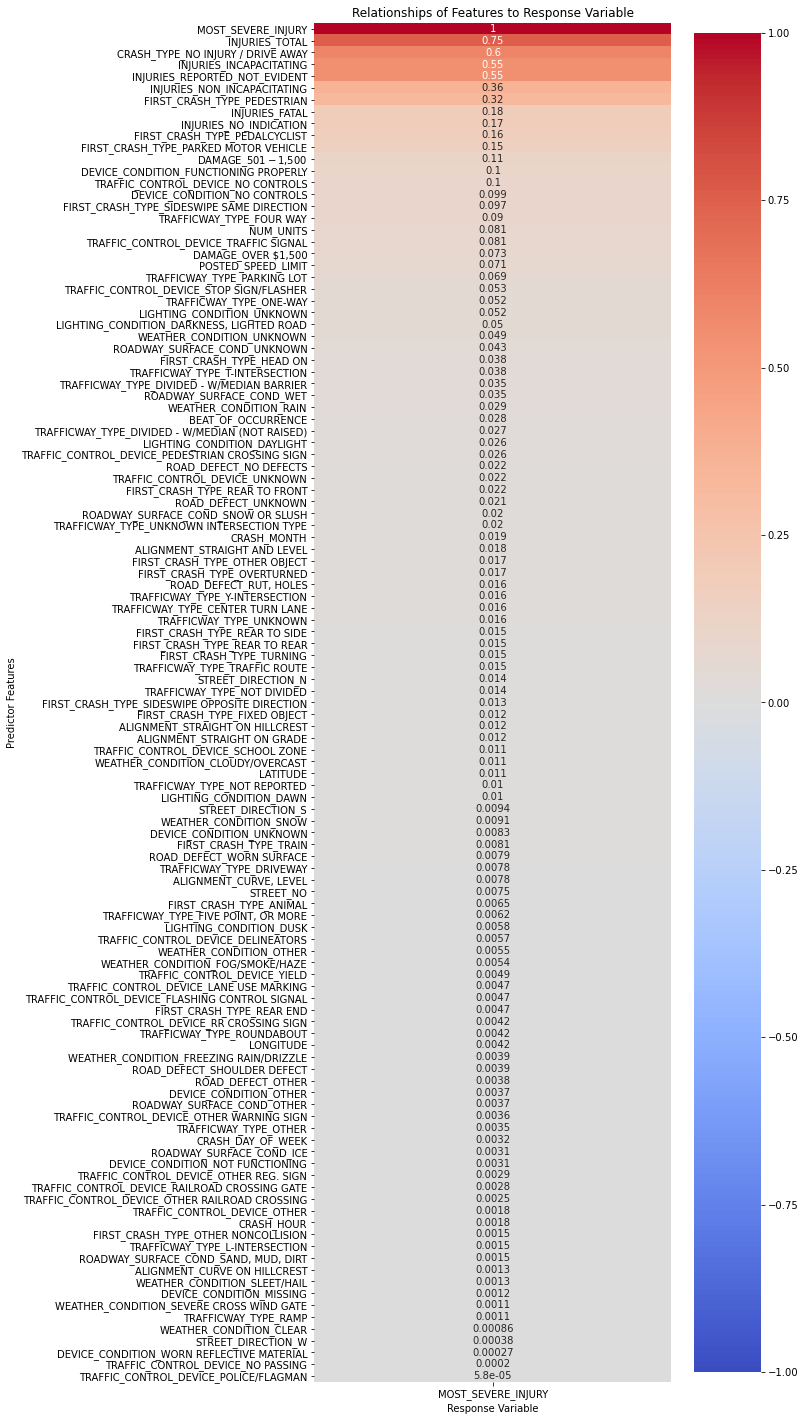

In [39]:
plt.figure(figsize=(8,25))
sns.heatmap(crashes2019dummies.corr()[['MOST_SEVERE_INJURY']].abs().sort_values(by=['MOST_SEVERE_INJURY'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

plt.title("Relationships of Features to Response Variable")
plt.xlabel("Response Variable")
plt.ylabel("Predictor Features");

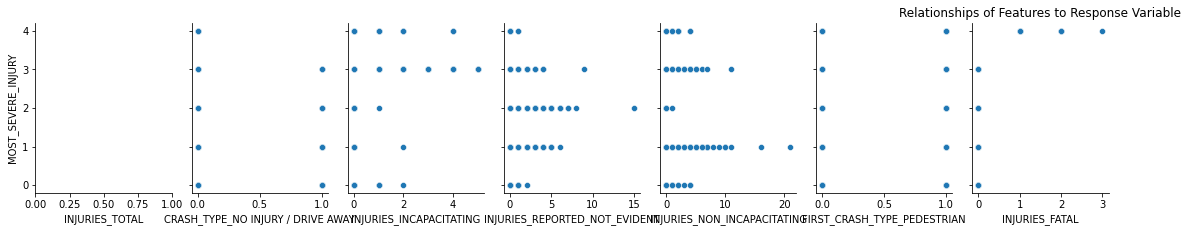

In [40]:
sns.pairplot(crashes2019dummies, kind='scatter', height=3, aspect=.75, x_vars = ['INJURIES_TOTAL', 'CRASH_TYPE_NO INJURY / DRIVE AWAY', 'INJURIES_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NON_INCAPACITATING','FIRST_CRASH_TYPE_PEDESTRIAN','INJURIES_FATAL'], y_vars = ['MOST_SEVERE_INJURY']);
plt.title("Relationships of Features to Response Variable");

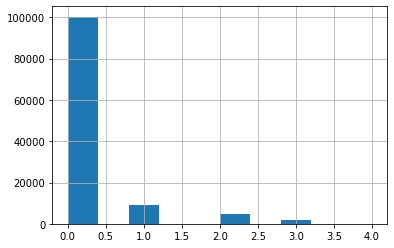

In [41]:
crashes2019dummies['MOST_SEVERE_INJURY'].hist();

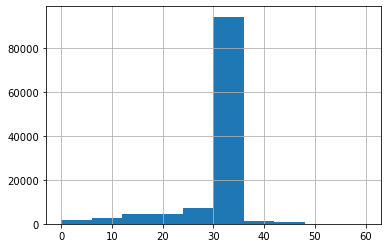

In [42]:
crashes2019dummies['POSTED_SPEED_LIMIT'].hist();

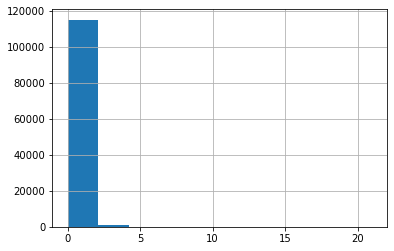

In [43]:
crashes2019dummies['INJURIES_TOTAL'].hist();

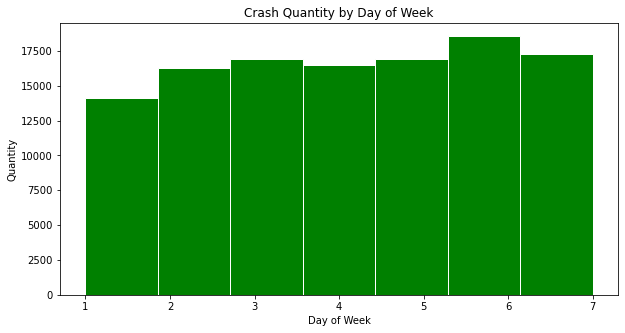

In [44]:
plt.figure(figsize = (10,5))
plt.hist(crashes2019dummies["CRASH_DAY_OF_WEEK"],
    color = "green",
    ec = "white",
        bins=7);
plt.title("")
plt.xlabel("")
plt.ylabel("");

plt.title("Crash Quantity by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Quantity");

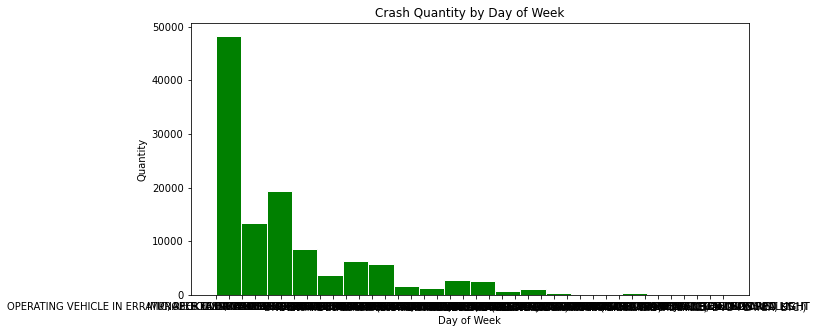

In [45]:
plt.figure(figsize = (10,5))
plt.hist(crashes2019dummies["PRIM_CONTRIBUTORY_CAUSE"],
    color = "green",
    ec = "white",
        bins=25);
plt.title("")
plt.xlabel("")
plt.ylabel("");

plt.title("Primary Contributing Causes")
plt.xlabel("Cause")
plt.ylabel("Quantity");


KeyboardInterrupt: 

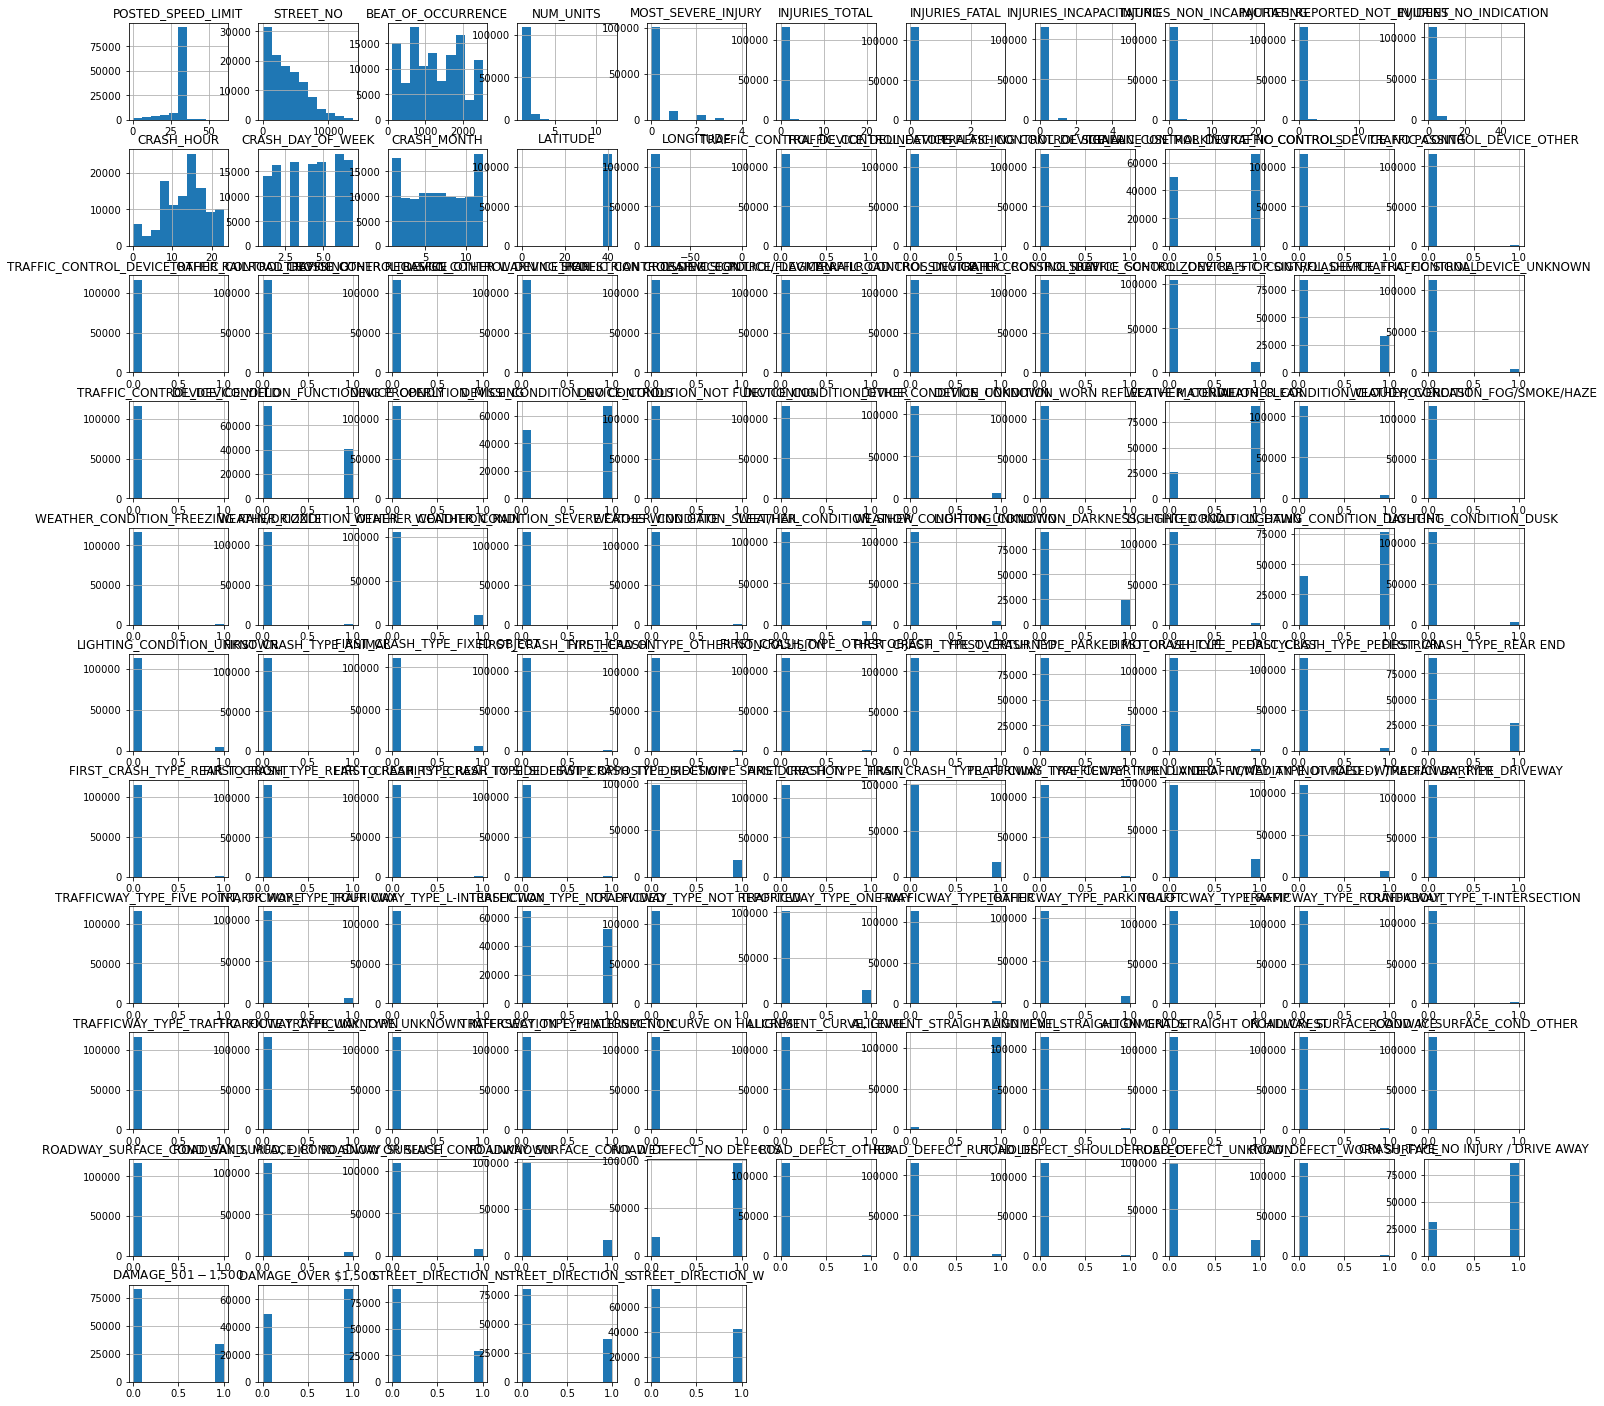

In [46]:
crashes2019dummies.hist(figsize = (25,25));
plt.tight_layout(pad=1, rect=(3, 1, 5, 3));

In [ ]:
crashes2019dummies.drop(columns=['CRASH_DATE',
                                 'PRIM_CONTRIBUTORY_CAUSE',
                                 'SEC_CONTRIBUTORY_CAUSE',
                                 'INJURIES_TOTAL',
                                 'INJURIES_FATAL',
                                 'INJURIES_INCAPACITATING',
                                 'INJURIES_NON_INCAPACITATING',
                                 'INJURIES_REPORTED_NOT_EVIDENT',
                                 'INJURIES_NO_INDICATION',
                                 'DATE_POLICE_NOTIFIED',
                                 'STREET_NAME','LATITUDE',
                                 'LONGITUDE',
                                 'LOCATION',
                                 'STREET_NO'],
                                 inplace=True)

In [ ]:
plt.figure(figsize=(8,25))
sns.heatmap(crashes2019dummies.corr()[['MOST_SEVERE_INJURY']].sort_values(by=['MOST_SEVERE_INJURY'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

plt.title("Relationships of Features to Response Variable")
plt.xlabel("Response Variable")
plt.ylabel("Predictor Features");